Null Hypothesis: There is no difference in mean mental health candidacy rating between self-employed and non-self-employed individuals.

Alternative Hypothesis: Self-employed individuals have a lower mean mental health candidacy rating compared to non-self-employed individuals.

Conclusion: Reject Null Hypothesis, Accept Alternative Hypothesis
Self-employed are less susceptible to mental health because of slightly lower prevalence of family history and mental health history and slightly lower growing stress. Self-employed individuals are more likely to seek or receive treatment for mental health issues compared to non-self-employed individuals.
Self-employment has a slightly higher likelihood of having care options available 


In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats

In [17]:
# Read the CSV file into a DataFrame
df_factors = pd.read_csv("df_factors.csv")

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
print(df_factors.head())

         timestamp  gender        country occupation self_employed  \
0  8/27/2014 11:37  Female  United States  Corporate            No   
1  8/27/2014 11:43  Female  United States  Corporate            No   
2  8/27/2014 11:49  Female         Poland  Corporate            No   
3  8/27/2014 11:51  Female      Australia  Corporate            No   
4  8/27/2014 11:52  Female  United States  Corporate            No   

   family_history  treatment days_indoors  growing_stress  changes_habits  \
0               1          1    1-14 days               1              -1   
1               1          1    1-14 days               1              -1   
2              -1          1    1-14 days               1              -1   
3               1          1    1-14 days               1              -1   
4              -1         -1    1-14 days               1              -1   

   mental_health_history  mood_swings  coping_struggles  work_interest  \
0                      1            0     

In [18]:
# Count the number of self-employed and employed individuals
self_employed_count = df_factors['self_employed'].value_counts()

# Print the counts
print("Self-Employed:", self_employed_count['Yes'])
print("Employed:", self_employed_count['No'])


Self-Employed: 29168
Employed: 257994


In [19]:
sample_df = df_factors.groupby('self_employed').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)
sample_df

/var/folders/ss/czqwrvv96tj11z503l2h0w980000gn/T/ipykernel_90896/722277263.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df_factors.groupby('self_employed').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)


,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,mental_health_severity,candidacy_rating
0,8/27/2014 11:56,Male,United States,Corporate,No,-1,-1,Go out Every day,-1,1,-1,-1,1,0,0,No,Not sure,-1,-3
1,8/29/2014 7:12,Male,United States,Corporate,No,-1,-1,31-60 days,1,0,0,0,-1,-1,-1,No,Not sure,-2,-1
2,8/27/2014 22:06,Male,United States,Housewife,No,1,1,15-30 days,1,0,1,0,-1,0,-1,No,No,0,4
3,8/27/2014 12:34,Male,United States,Student,No,1,-1,Go out Every day,0,0,-1,1,-1,-1,-1,No,No,-3,-1
4,8/29/2014 9:29,Male,United States,Business,No,1,1,Go out Every day,1,1,1,1,1,-1,1,Maybe,Yes,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8/28/2014 6:02,Male,Ireland,Housewife,Yes,-1,-1,15-30 days,1,0,1,0,-1,0,-1,Maybe,No,0,0
19996,8/28/2014 14:51,Male,Denmark,Student,Yes,1,1,More than 2 months,0,-1,0,-1,-1,0,0,Maybe,Yes,-3,1
19997,8/28/2014 16:56,Male,Netherlands,Business,Yes,-1,1,15-30 days,0,0,-1,0,1,0,1,No,No,1,-1
19998,8/27/2014 13:08,Male,Germany,Student,Yes,-1,1,31-60 days,0,1,0,1,1,-1,0,Maybe,Yes,2,1


In [20]:
# Count the number of self-employed and employed individuals
self_employed_sample_count = sample_df['self_employed'].value_counts()

# Print the counts
print("Self-Employed:", self_employed_sample_count['Yes'])
print("Employed:", self_employed_sample_count['No'])

Self-Employed: 10000
Employed: 10000


In [21]:

# Group by 'self_employed' and calculate the statistical summary of 'candidacy_rating'
mean_candidacy = sample_df.groupby('self_employed')['candidacy_rating'].mean()
variance_candidacy = sample_df.groupby('self_employed')['candidacy_rating'].var()
std_deviation_candidacy = sample_df.groupby('self_employed')['candidacy_rating'].std()

# Print the mean ratings
print("Mean for self-employed individuals:", mean_candidacy['Yes'])
print("Mean for non-self-employed individuals:", mean_candidacy['No'])
print("Variance for self-employed individuals:", variance_candidacy['Yes'])
print("Variance for non-self-employed individuals:", variance_candidacy['No'])
print("Standard Deviation for self-employed individuals:", std_deviation_candidacy['No'])
print("Standard Deviation for non-self-employed individuals:", std_deviation_candidacy['No'])

Mean for self-employed individuals: -0.0153
Mean for non-self-employed individuals: -0.1456
Variance for self-employed individuals: 4.612727182718284
Variance for non-self-employed individuals: 4.827283368336843
Standard Deviation for self-employed individuals: 2.197107955549031
Standard Deviation for non-self-employed individuals: 2.197107955549031


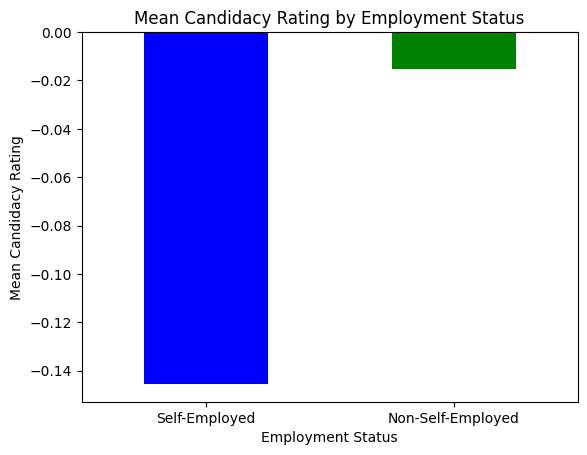

In [22]:

# Create a bar plot
# Plotting the mean candidacy ratings
fig, ax = plt.subplots()
mean_candidacy.plot(kind='bar', ax=ax, color=['blue', 'green'])
ax.set_xlabel('Employment Status')
ax.set_ylabel('Mean Candidacy Rating')
ax.set_title('Mean Candidacy Rating by Employment Status')
ax.set_xticklabels(['Self-Employed', 'Non-Self-Employed'], rotation=0)
plt.show()


In [23]:
# Split data into two groups based on self-employment status
self_employed_data = sample_df[sample_df['self_employed'] == 'Yes']['candidacy_rating']
non_self_employed_data = sample_df[sample_df['self_employed'] == 'No']['candidacy_rating']

# Perform t-test
t_statistic, p_value = ttest_ind(self_employed_data, non_self_employed_data)

# Determine degrees of freedom
degrees_of_freedom = len(self_employed_data) + len(non_self_employed_data) - 2

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean mental health candidacy rating between self-employed and non-self-employed individuals.")
else:
    print("Cannot reject null hypothesis: There is no significant difference in mean mental health candidacy rating between self-employed and non-self-employed individuals.")



t-statistic: 4.240901405180638
p-value: 2.236240127762111e-05
Degrees of Freedom: 19998
Reject null hypothesis: There is a significant difference in mean mental health candidacy rating between self-employed and non-self-employed individuals.


The t-statistic (4.24) indicates a relatively large difference between the means of the two groups.
The small p-value (approximately 0) suggests strong evidence against the null hypothesis.
With a large number of degrees of freedom, the t-distribution approaches the normal distribution, making the results more reliable.

there is a significant difference in mean mental health candidacy rating between self-employed and non-self-employed individuals

In [34]:

# Group by 'self_employed' and mental_health_candidacy factors, then calculate the mean per factor
mental_health_candidacy = sample_df.groupby(['self_employed'])[
    ['family_history','mental_health_history','growing_stress', 'treatment','changes_habits']
].mean()

# Print the result
print(mental_health_candidacy)


               family_history  mental_health_history  growing_stress  \
self_employed                                                          
No                    -0.2128                -0.0297          0.0201   
Yes                   -0.1752                -0.0456          0.0094   

               treatment  changes_habits  
self_employed                             
No                0.0050          0.0718  
Yes               0.1158          0.0803  


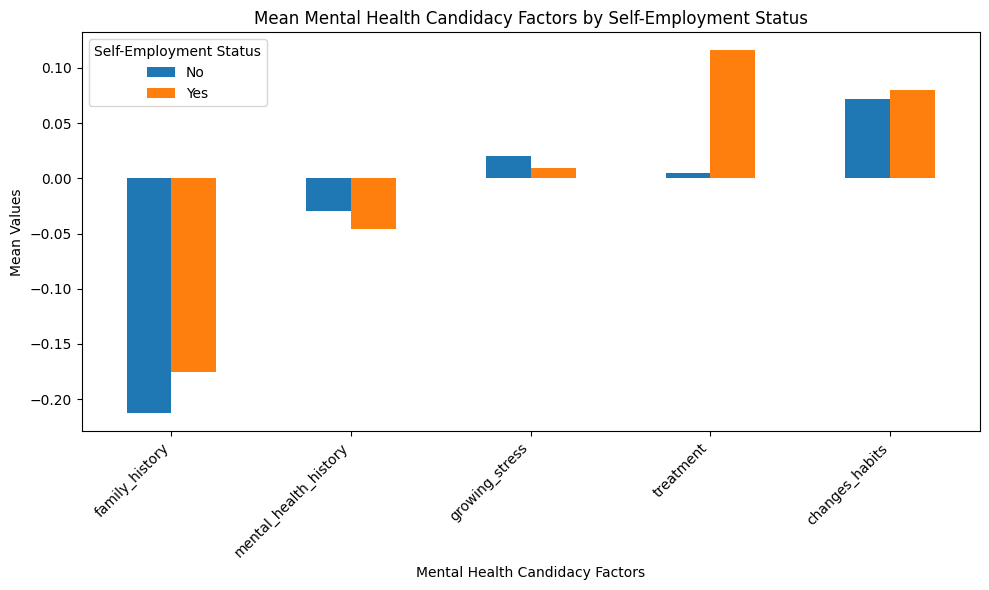

In [35]:
# Transpose the DataFrame for easier plotting
mental_health_candidacy = mental_health_candidacy.T

# Plot the bar chart
mental_health_candidacy.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Mean Mental Health Candidacy Factors by Self-Employment Status')
plt.xlabel('Mental Health Candidacy Factors')
plt.ylabel('Mean Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add legend
plt.legend(title='Self-Employment Status')

# Show plot
plt.tight_layout()
plt.show()


Family History: self-employed individuals, on average, may have a slightly lower prevalence of family history related to mental health issues.

Mental Health History: self-employed individuals, on average, may have a lower personal history of mental health issues compared to non-self-employed individuals.

Growing Stress: Self-employed individuals seem to have slightly lower growing stress on average compared to non-self-employed individuals.

Treatment: self-employed individuals are more likely to seek or receive treatment for mental health issues compared to non-self-employed individuals.

Changes in Habits: self-employed individuals may exhibit slightly more changes in habits compared to non-self-employed individuals.

In [26]:

# Group by 'self_employed' and calculate the mean of 'candidacy_rating'
mean_rating_by_employment_severity = sample_df.groupby('self_employed')['mental_health_severity'].mean()

# Group by 'self_employed' and calculate the statistical summary of 'mental_health_severity'
mean_severity = sample_df.groupby('self_employed')['mental_health_severity'].mean()
variance_severity = sample_df.groupby('self_employed')['mental_health_severity'].var()
std_deviation_severity = sample_df.groupby('self_employed')['mental_health_severity'].std()

# Print the mean ratings
print("Mean for self-employed individuals:", mean_severity['Yes'])
print("Mean for non-self-employed individuals:", mean_severity['No'])
print("Variance for self-employed individuals:", variance_severity['Yes'])
print("Variance for non-self-employed individuals:", variance_severity['No'])
print("Standard Deviation for self-employed individuals:", std_deviation_severity['No'])
print("Standard Deviation for non-self-employed individuals:", std_deviation_severity['No'])

Mean for self-employed individuals: -0.035
Mean for non-self-employed individuals: 0.0299
Variance for self-employed individuals: 4.505425542554281
Variance for non-self-employed individuals: 4.62926891689169
Standard Deviation for self-employed individuals: 2.151573590861277
Standard Deviation for non-self-employed individuals: 2.151573590861277


In [27]:
# Split data into two groups based on self-employment status
self_employed_data_severity = sample_df[sample_df['self_employed'] == 'Yes']['mental_health_severity']
non_self_employed_data_severity = sample_df[sample_df['self_employed'] == 'No']['mental_health_severity']

# Perform t-test
t_statistic, p_value = ttest_ind(self_employed_data_severity, non_self_employed_data_severity)

# Determine degrees of freedom
degrees_of_freedom = len(self_employed_data_severity) + len(non_self_employed_data_severity) - 2

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in mean mental health severity rating between self-employed and non-self-employed individuals.")
else:
    print("Cannot reject null hypothesis: There is no significant difference in mean mental health severity rating between self-employed and non-self-employed individuals.")


t-statistic: -2.147324523832043
p-value: 0.031779438282348416
Degrees of Freedom: 19998
Reject null hypothesis: There is a significant difference in mean mental health severity rating between self-employed and non-self-employed individuals.


In [36]:
# Group by 'self_employed' and mental_health_candidacy factors, then calculate the mean per factor
mental_health_severity = sample_df.groupby(['self_employed'])[
    ['mood_swings', 'coping_struggles', 'work_interest', 'social_weakness','changes_habits','mental_health_history']
].mean()

# Print the result
print(mental_health_severity)

               mood_swings  coping_struggles  work_interest  social_weakness  \
self_employed                                                                  
No                 -0.0291           -0.0538         0.0689          -0.0183   
Yes                -0.0359           -0.0748         0.0613          -0.0297   

               changes_habits  mental_health_history  
self_employed                                         
No                     0.0718                -0.0297  
Yes                    0.0803                -0.0456  


Self-employed individuals generally exhibit slightly higher mean values in coping struggles, social weakness, and changes in habits compared to non-self-employed individuals.

Both groups show variability in mood (mood swings) and a positive interest in work-related activities (work interest).

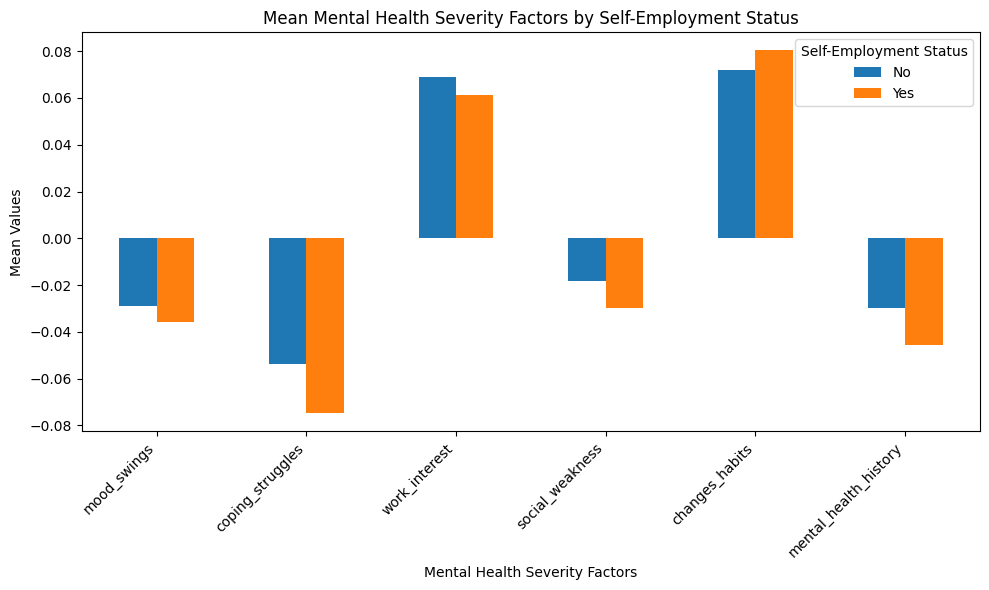

In [37]:
# Transpose the DataFrame for easier plotting
mental_health_severity= mental_health_severity.T

# Plot the bar chart
mental_health_severity.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Mean Mental Health Severity Factors by Self-Employment Status')
plt.xlabel('Mental Health Severity Factors')
plt.ylabel('Mean Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add legend
plt.legend(title='Self-Employment Status')

# Show plot
plt.tight_layout()
plt.show()

In [39]:
# Group by 'days_indoors' and 'self_employed' and count occurrences
self_employment_days_indoors = sample_df.groupby(['days_indoors', 'self_employed']).size().reset_index(name='count')

# Print the grouped data in a nice summary table
print("Summary of Days Indoors by Self-Employment Status:")
print(self_employment_days_indoors)


Summary of Days Indoors by Self-Employment Status:
         days_indoors self_employed  count
0           1-14 days            No   2217
1           1-14 days           Yes   2183
2          15-30 days            No   1856
3          15-30 days           Yes   1825
4          31-60 days            No   2069
5          31-60 days           Yes   2102
6    Go out Every day            No   1932
7    Go out Every day           Yes   2005
8  More than 2 months            No   1926
9  More than 2 months           Yes   1885


Self-employed individuals tend to go out every day slightly more frequently than non-self-employed individuals.

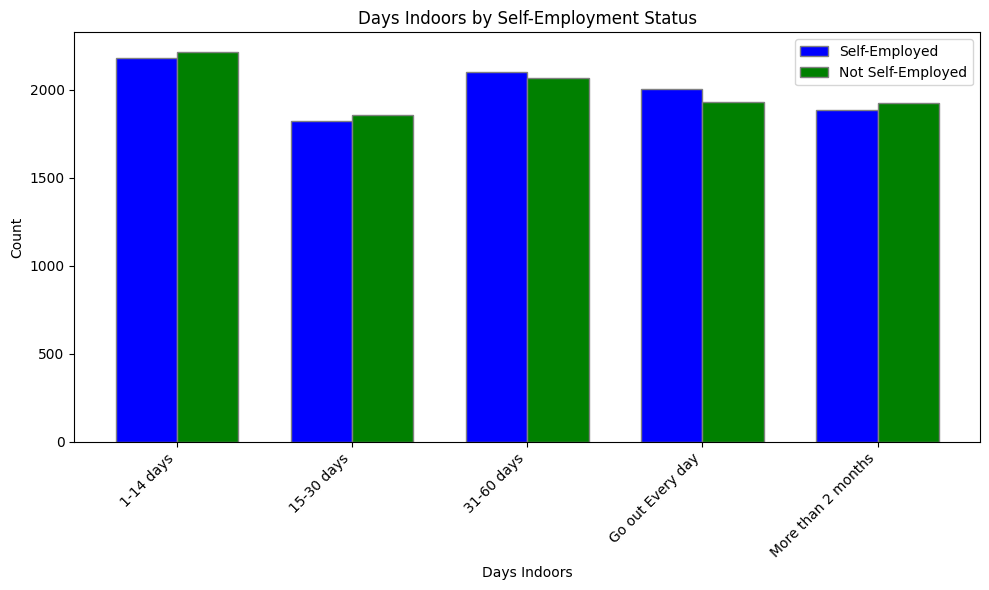

In [41]:
# Extracting data for plotting
days_indoors = self_employment_days_indoors['days_indoors'].unique()
self_employed_data = self_employment_days_indoors[self_employment_days_indoors['self_employed'] == 'Yes']['count']
non_self_employed_data = self_employment_days_indoors[self_employment_days_indoors['self_employed'] == 'No']['count']

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Position of bars on x-axis
r1 = range(len(days_indoors))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, self_employed_data, color='b', width=bar_width, edgecolor='grey', label='Self-Employed')
ax.bar(r2, non_self_employed_data, color='g', width=bar_width, edgecolor='grey', label='Not Self-Employed')

# Add labels and title
ax.set_xlabel('Days Indoors')
ax.set_ylabel('Count')
ax.set_title('Days Indoors by Self-Employment Status')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(days_indoors, rotation=45, ha='right')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [42]:
# Group by 'days_indoors' and 'self_employed' and count occurrences
self_employment_care_options = sample_df.groupby(['care_options', 'self_employed']).size().reset_index(name='count')

# Print the grouped data in a nice summary table
print("Summary of Care Options by Self-Employment Status:")
print(self_employment_care_options)

Summary of Care Options by Self-Employment Status:
  care_options self_employed  count
0           No            No   4064
1           No           Yes   3716
2     Not sure            No   2726
3     Not sure           Yes   2139
4          Yes            No   3210
5          Yes           Yes   4145


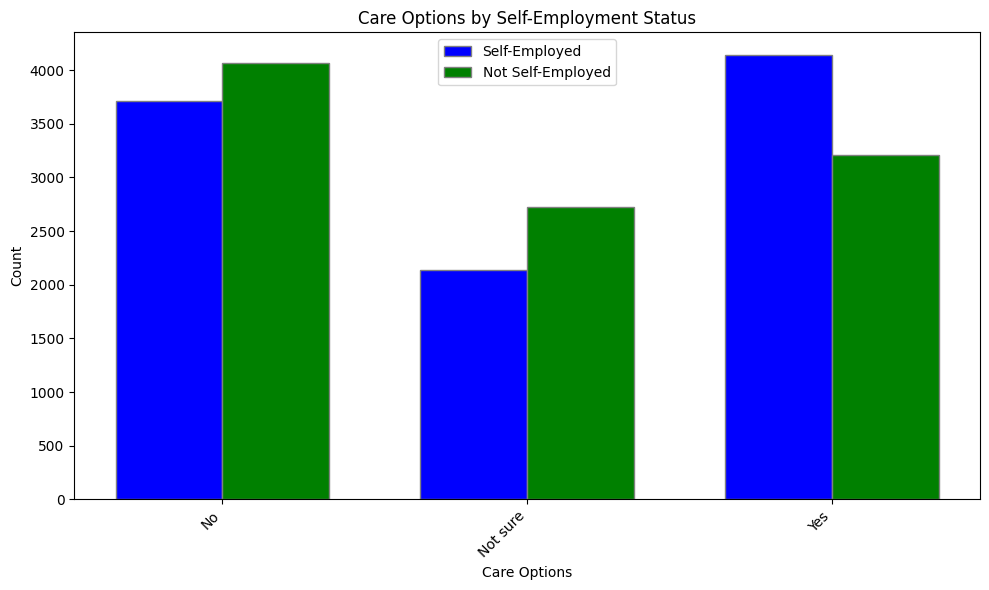

In [44]:
# Extracting data for plotting
care_options = self_employment_care_options['care_options'].unique()
self_employed_data = self_employment_care_options[self_employment_care_options['self_employed'] == 'Yes']['count']
non_self_employed_data = self_employment_care_options[self_employment_care_options['self_employed'] == 'No']['count']

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Position of bars on x-axis
r1 = range(len(care_options))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, self_employed_data, color='b', width=bar_width, edgecolor='grey', label='Self-Employed')
ax.bar(r2, non_self_employed_data, color='g', width=bar_width, edgecolor='grey', label='Not Self-Employed')

# Add labels and title
ax.set_xlabel('Care Options')
ax.set_ylabel('Count')
ax.set_title('Care Options by Self-Employment Status')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(care_options, rotation=45, ha='right')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Self-employment has a slightly higher likelihood of having care options available 
Non-self-employed individualsare more likely to be unsure about their care options 